In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from dash import Dash

In [5]:
url ='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

iris = pd.read_csv(url)
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
iris.shape

(150, 5)

In [7]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


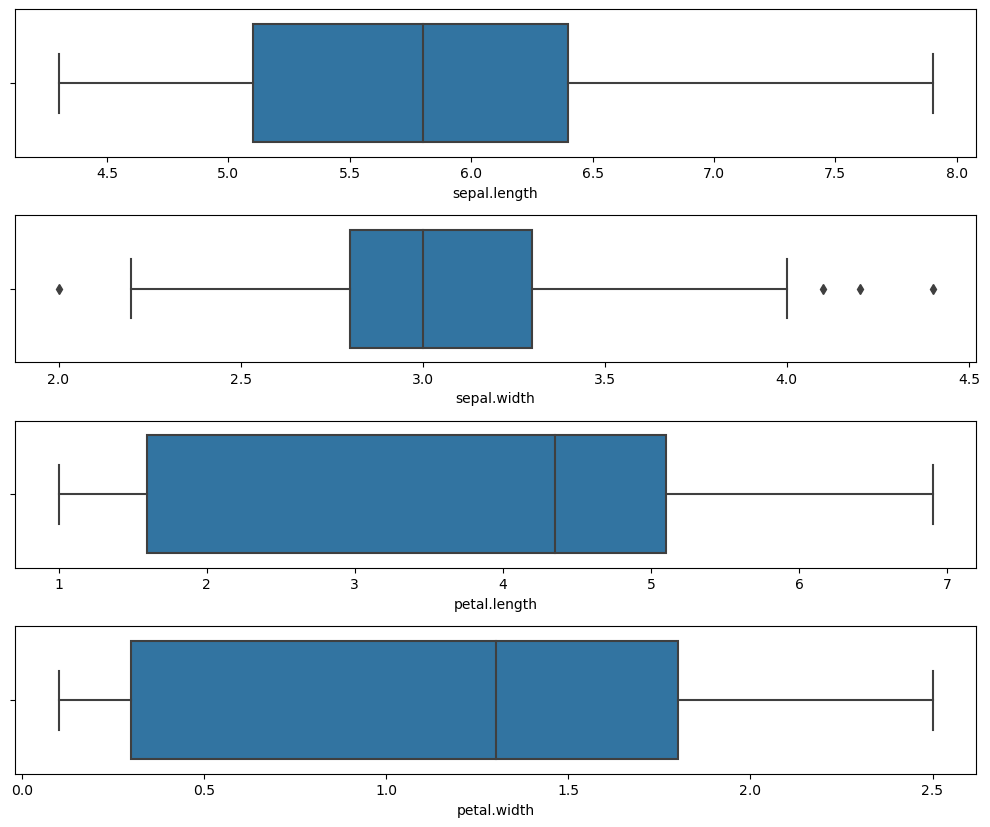

In [23]:
plt.figure(figsize=(10,10))
for i, col in zip(range(1, iris.shape[1]), iris.columns):
    plt.subplot(5,1,i)
    sns.boxplot(x=iris[col]);
    plt.tight_layout()

identificando os outliers de sepal width

In [44]:
iris[iris['sepal.width'] > 4]

,sepal.length,sepal.width,petal.length,petal.width,variety
15,5.7,4.4,1.5,0.4,Setosa
32,5.2,4.1,1.5,0.1,Setosa
33,5.5,4.2,1.4,0.2,Setosa


In [45]:
iris[iris['sepal.width'] == 2]

,sepal.length,sepal.width,petal.length,petal.width,variety
60,5.0,2.0,3.5,1.0,Versicolor


Contando numero de amostras para cada especie

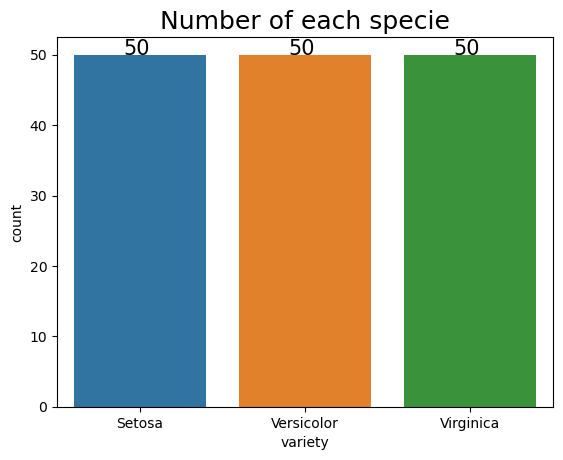

In [30]:
ax = sns.countplot(x='variety', data=iris);
plt.title('Number of each specie', fontsize=18)
for p in ax.patches:
    plt.annotate(p.get_height(), xy=(p.get_x()+0.3, p.get_height()), fontsize=15)

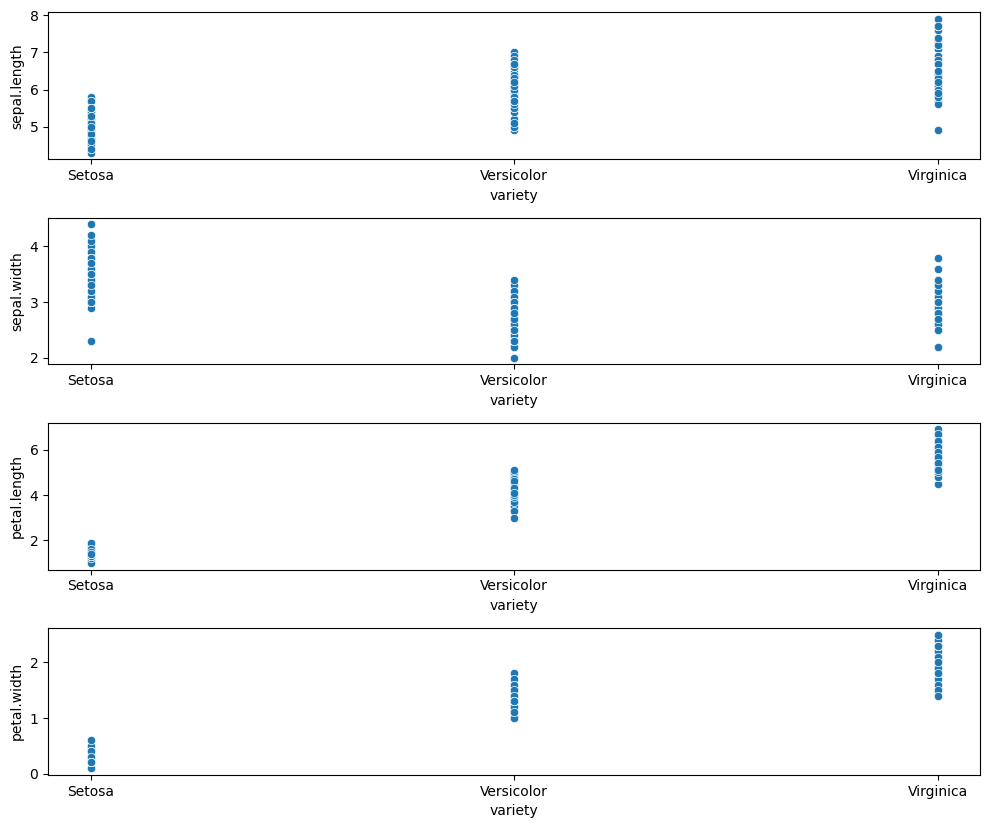

In [33]:
plt.figure(figsize=(10,10))
for i, col in zip(range(1, iris.shape[1]), iris.columns):
    plt.subplot(5,1,i)
    sns.scatterplot(y=iris[col], x=iris['variety']);
    plt.tight_layout()

<AxesSubplot:>

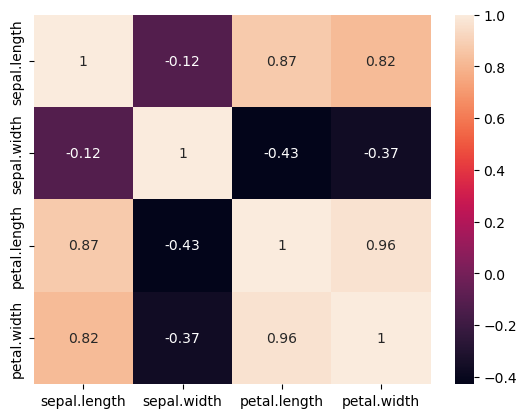

In [52]:
correlation = iris.corr()
sns.heatmap(correlation, annot=True)

Modelo mais simples

In [54]:
from sklearn.model_selection import train_test_split

X = iris.drop(columns=['variety'])
y = iris.variety

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [58]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array(['Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Setosa',
       'Versicolor', 'Virginica', 'Virginica', 'Setosa', 'Setosa',
       'Virginica', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor'],
      dtype=object)

In [60]:
pd.DataFrame({'Predict':y_pred,
             'Real': y_test})

,Predict,Real
145,Virginica,Virginica
61,Versicolor,Versicolor
22,Setosa,Setosa
51,Versicolor,Versicolor
37,Setosa,Setosa
72,Versicolor,Versicolor
146,Virginica,Virginica
103,Virginica,Virginica
27,Setosa,Setosa
41,Setosa,Setosa


In [69]:
from sklearn.metrics import precision_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         9
  Versicolor       0.92      0.92      0.92        12
   Virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



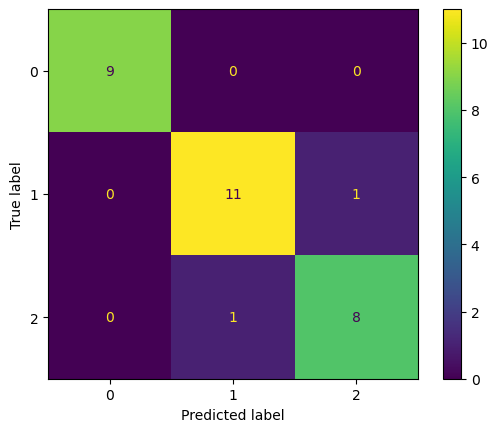

In [75]:
matriz_confusao = confusion_matrix(y_test, y_pred, labels= model.classes_)
cm = ConfusionMatrixDisplay(matriz_confusao)
cm.plot()

Melhorando o modelo